<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Mortgage-Backed-Securities-Prepayment-Risk</h1>
</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

 <center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Reading and Exploring Data</h1>
</center>

In [2]:
df = pd.read_csv('StudentInfo.csv',low_memory=False)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
print("Shape of the datset : " , df.shape)
print("Size of the datset : " , df.size)
print("Dimension of the datset : " , df.ndim)
print("Length of the datset : " , len(df))

Shape of the datset :  (1044, 33)
Size of the datset :  34452
Dimension of the datset :  2
Length of the datset :  1044


In [4]:
(df.isnull().sum()/df.shape[0])*100

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64

There are no null/missing values 🥳

In [5]:
# To see basic Statistics about the data ->
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

We have all categorical, ordinal, numerical attrubutes 🧐

<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Univariate Analysis</h1>
</center>

In [7]:
# types of school 
df['school'].value_counts()

school
LVA    485
GP     349
SLA    164
MS      46
Name: count, dtype: int64

<Axes: xlabel='school', ylabel='count'>

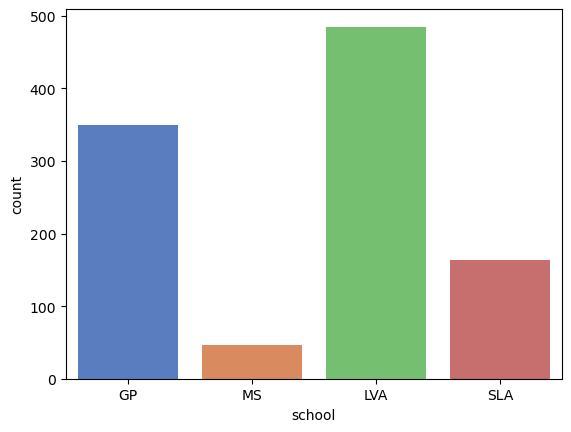

In [8]:
# Below code will create a count plot
sns.countplot(data = df,x='school', palette='muted')

In [9]:
# age of students present in the dataset
df['age'].value_counts()

age
16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='count'>

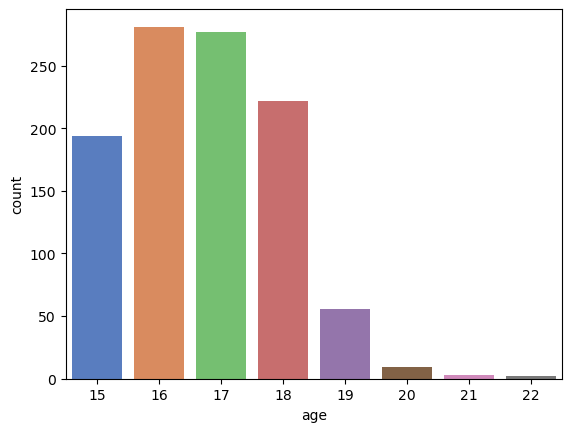

In [10]:
# Below code will create a count plot
sns.countplot(data = df,x='age', palette='muted')

In [11]:
#  U - urban, R - Rural
df['address'].value_counts()

address
U    759
R    285
Name: count, dtype: int64

<Axes: xlabel='address', ylabel='count'>

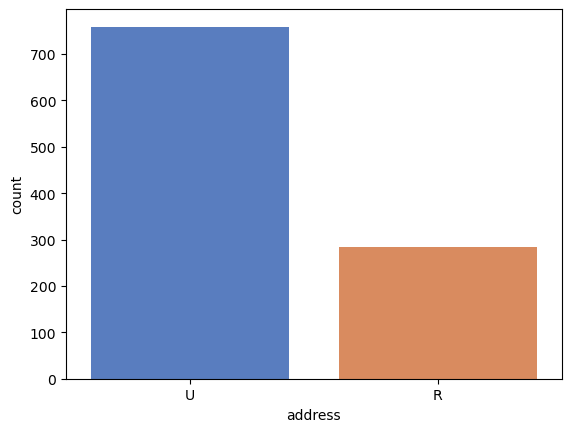

In [12]:
# Below code will create a count plot
sns.countplot(data = df,x='address', palette='muted')

In [13]:
# GT3 - greater than 3 members in family, LE3 - Less than 3 members
df['famsize'].value_counts()

famsize
GT3    738
LE3    306
Name: count, dtype: int64

<Axes: xlabel='famsize', ylabel='count'>

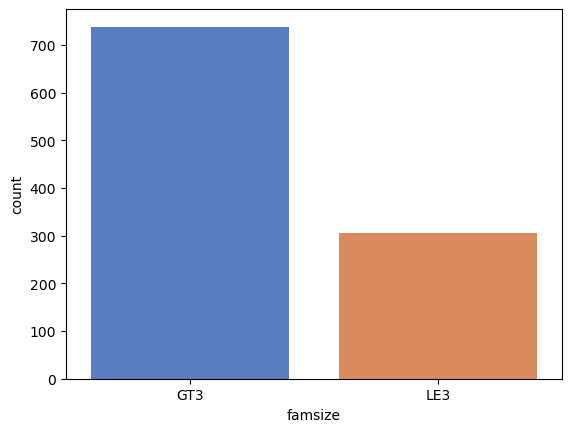

In [14]:
# Below code will create a count plot
sns.countplot(data = df,x='famsize', palette='muted')

In [15]:
# T - parentsare together, A - Apart
df['Pstatus'].value_counts()

Pstatus
T    923
A    121
Name: count, dtype: int64

<Axes: xlabel='Pstatus', ylabel='count'>

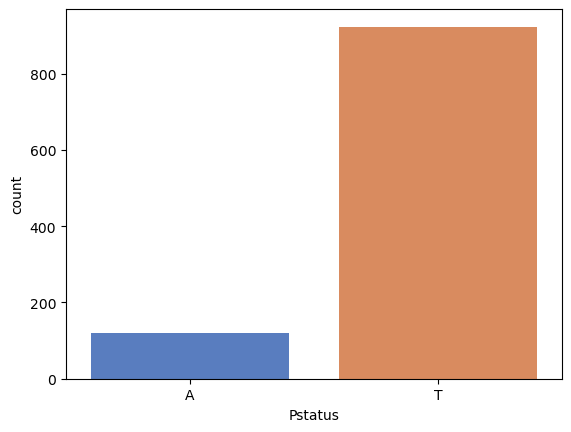

In [16]:
# Below code will create a count plot
sns.countplot(data = df,x='Pstatus', palette='muted')

In [17]:
#Mothers education  (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) 
df['Medu'].value_counts()

/Users/divya/anaconda3/lib/python3.11/site-packages/IPython/core/inputtransformer2.py:627: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  tokens_by_line = make_tokens_by_line(lines)


Medu
4    306
2    289
3    238
1    202
0      9
Name: count, dtype: int64

<Axes: xlabel='Medu', ylabel='count'>

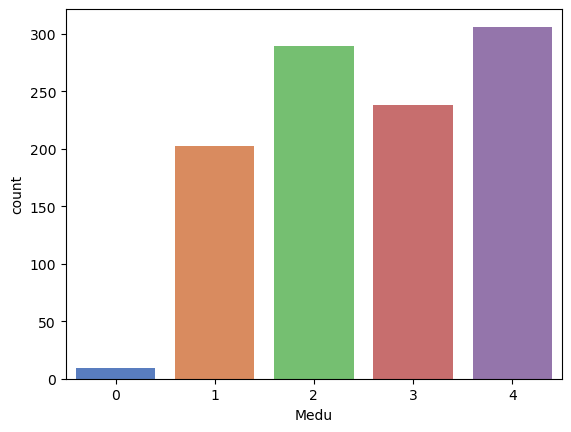

In [18]:
# Below code will create a count plot
sns.countplot(data = df,x='Medu', palette='muted')

In [19]:
#fathers education
df['Fedu'].value_counts()

Fedu
2    324
1    256
3    231
4    224
0      9
Name: count, dtype: int64

<Axes: xlabel='Fedu', ylabel='count'>

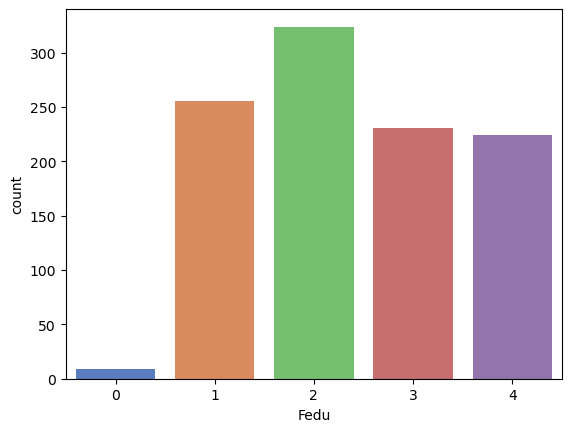

In [20]:
# Below code will create a count plot
sns.countplot(data = df,x='Fedu', palette='muted')

In [21]:
# Moms job
df['Mjob'].value_counts()

Mjob
other       399
services    239
at_home     194
teacher     130
health       82
Name: count, dtype: int64

<Axes: xlabel='Mjob', ylabel='count'>

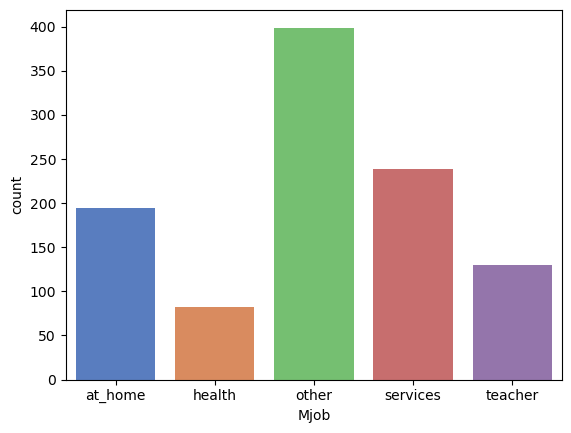

In [22]:
# Below code will create a count plot
sns.countplot(data = df,x='Mjob', palette='muted')

In [23]:
#fathers job
df['Fjob'].value_counts()

Fjob
other       584
services    292
teacher      65
at_home      62
health       41
Name: count, dtype: int64

<Axes: xlabel='Fjob', ylabel='count'>

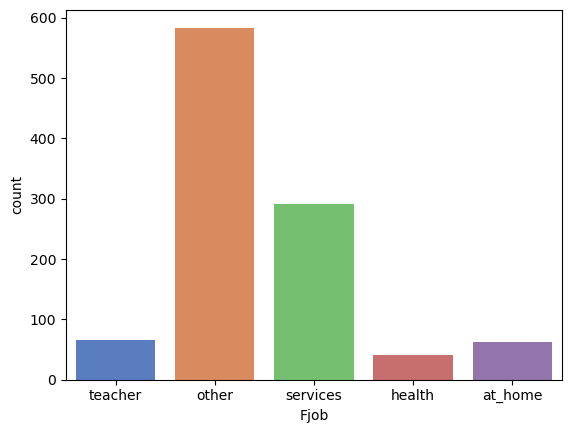

In [24]:
# Below code will create a count plot
sns.countplot(data = df,x='Fjob', palette='muted')

In [25]:
# reason to choose this school
df['reason'].value_counts()

reason
course        430
home          258
reputation    248
other         108
Name: count, dtype: int64

<Axes: xlabel='reason', ylabel='count'>

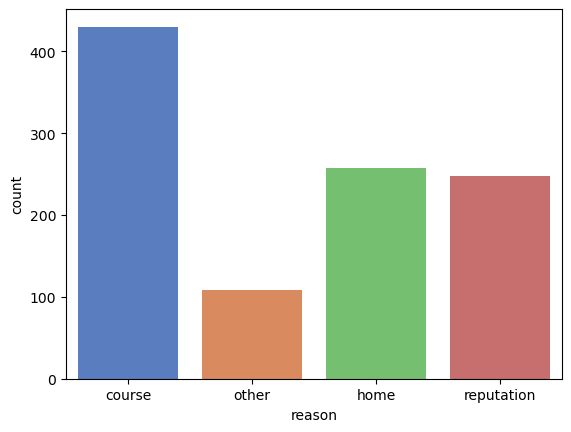

In [26]:
# Below code will create a count plot
sns.countplot(data = df,x='reason', palette='muted')

In [27]:
# student's guardian
df['guardian'].value_counts()

guardian
mother    728
father    243
other      73
Name: count, dtype: int64

<Axes: xlabel='guardian', ylabel='count'>

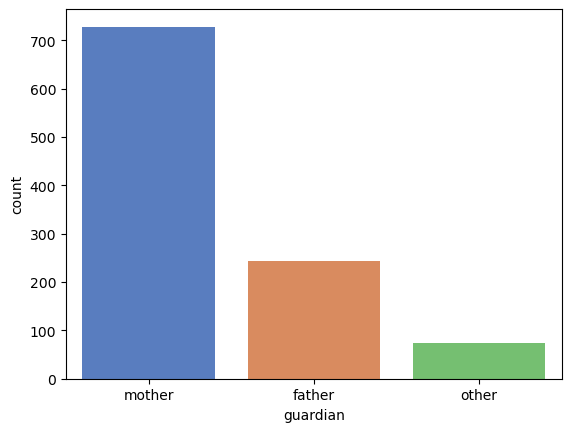

In [28]:
# Below code will create a count plot
sns.countplot(data = df,x='guardian', palette='muted')

In [29]:
# home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
df['traveltime'].value_counts()

/Users/divya/anaconda3/lib/python3.11/site-packages/IPython/core/inputtransformer2.py:627: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  tokens_by_line = make_tokens_by_line(lines)


traveltime
1    623
2    320
3     77
4     24
Name: count, dtype: int64

<Axes: xlabel='traveltime', ylabel='count'>

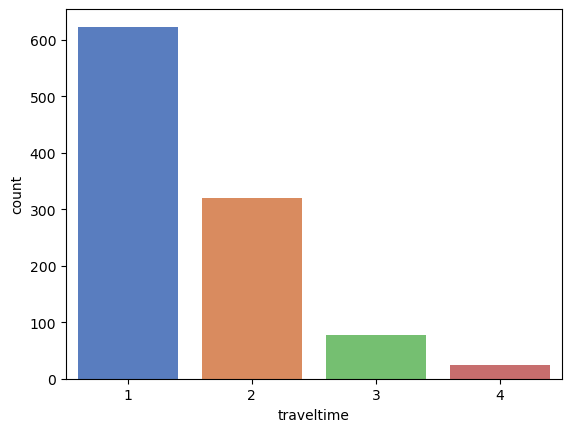

In [30]:
# Below code will create a count plot
sns.countplot(data = df,x='traveltime', palette='muted')

In [31]:
# weekly study time
df['studytime'].value_counts()

studytime
2    503
1    317
3    162
4     62
Name: count, dtype: int64

<Axes: xlabel='studytime', ylabel='count'>

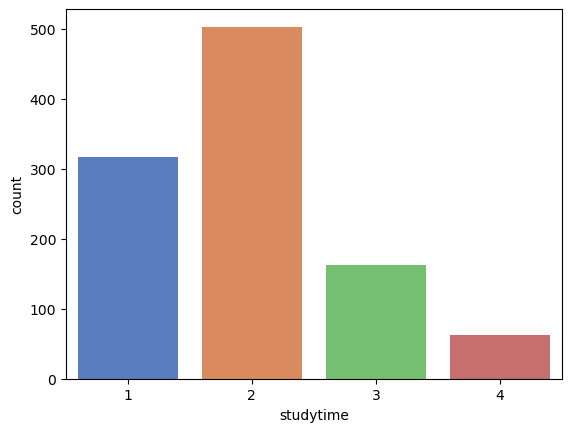

In [32]:
# Below code will create a count plot
sns.countplot(data = df,x='studytime', palette='muted')

In [33]:
# number of past class failures
df['failures'].value_counts()

failures
0    861
1    120
2     33
3     30
Name: count, dtype: int64

<Axes: xlabel='failures', ylabel='count'>

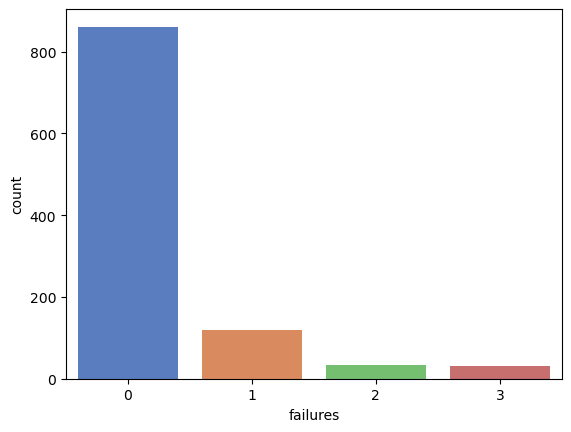

In [34]:
# Below code will create a count plot
sns.countplot(data = df,x='failures', palette='muted')

In [35]:
#extra educational support
df['schoolsup'].value_counts()

schoolsup
no     925
yes    119
Name: count, dtype: int64

<Axes: xlabel='schoolsup', ylabel='count'>

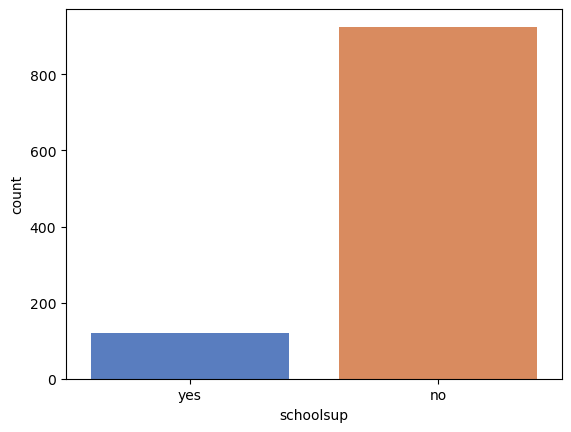

In [36]:
# Below code will create a count plot
sns.countplot(data = df,x='schoolsup', palette='muted')

In [37]:
#family educational support
df['famsup'].value_counts()

famsup
yes    640
no     404
Name: count, dtype: int64

<Axes: xlabel='famsup', ylabel='count'>

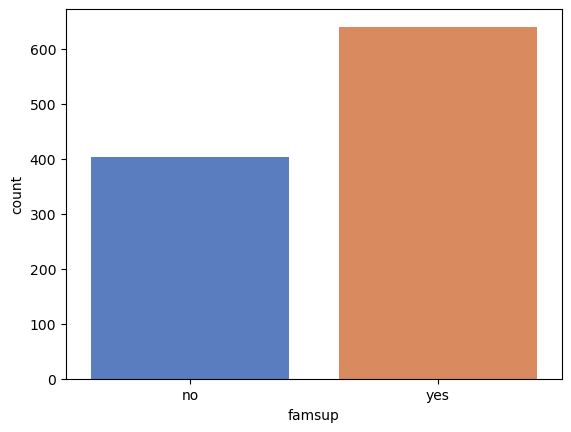

In [38]:
# Below code will create a count plot
sns.countplot(data = df,x='famsup', palette='muted')

In [39]:
#extra paid classes within the course subject (Math or Portuguese)
df['paid'].value_counts()

paid
no     824
yes    220
Name: count, dtype: int64

<Axes: xlabel='paid', ylabel='count'>

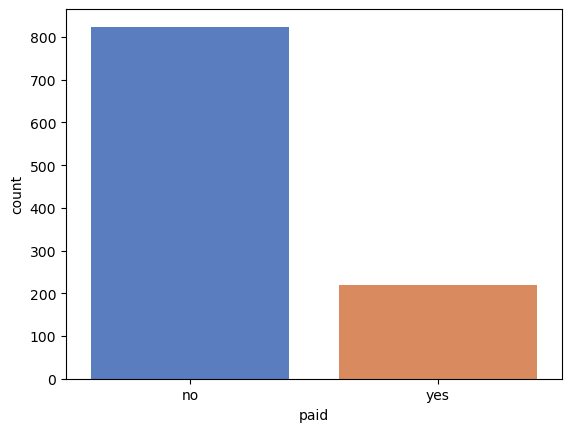

In [40]:
# Below code will create a count plot
sns.countplot(data = df,x='paid', palette='muted')

In [41]:
#extra-curricular activities
df['activities'].value_counts()

activities
no     528
yes    516
Name: count, dtype: int64

<Axes: xlabel='activities', ylabel='count'>

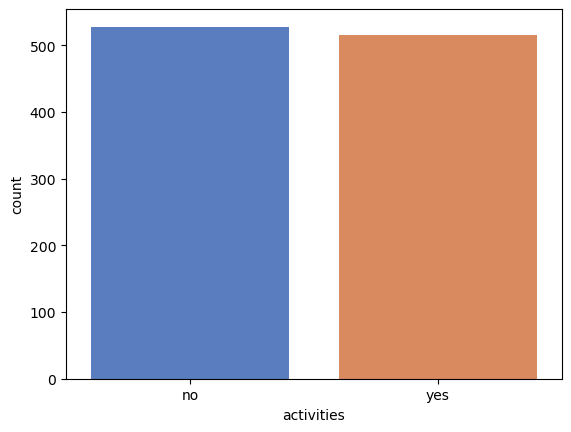

In [42]:
# Below code will create a count plot
sns.countplot(data = df,x='activities', palette='muted')

In [43]:
#attended nursery school
df['nursery'].value_counts()

nursery
yes    835
no     209
Name: count, dtype: int64

<Axes: xlabel='nursery', ylabel='count'>

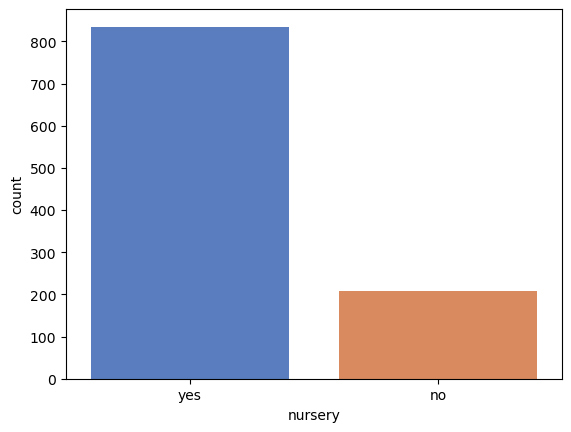

In [44]:
# Below code will create a count plot
sns.countplot(data = df,x='nursery', palette='muted')

In [45]:
#wants to take higher education
df['higher'].value_counts()

higher
yes    955
no      89
Name: count, dtype: int64

<Axes: xlabel='higher', ylabel='count'>

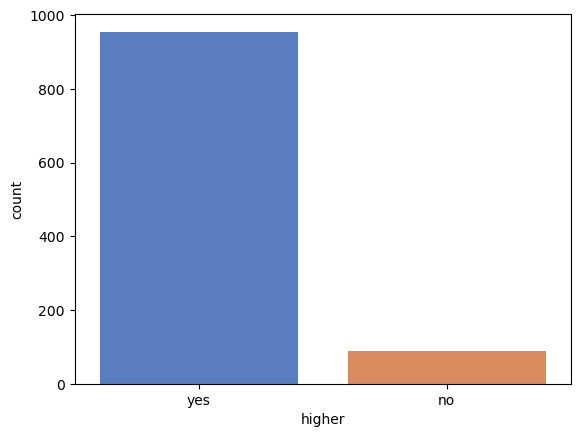

In [46]:
# Below code will create a count plot
sns.countplot(data = df,x='higher', palette='muted')

In [47]:
#Internet access at home
df['internet'].value_counts()

internet
yes    827
no     217
Name: count, dtype: int64

<Axes: xlabel='internet', ylabel='count'>

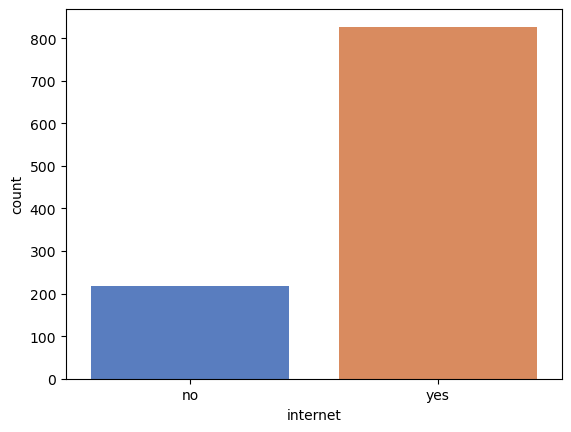

In [48]:
# Below code will create a count plot
sns.countplot(data = df,x='internet', palette='muted')

In [49]:
#with a romantic relationship
df['romantic'].value_counts()

romantic
no     673
yes    371
Name: count, dtype: int64

<Axes: xlabel='romantic', ylabel='count'>

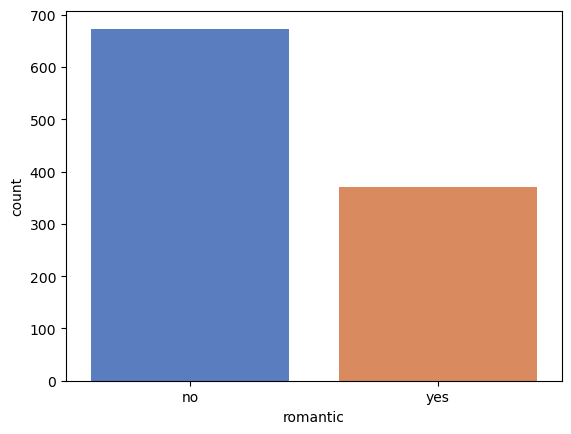

In [50]:
# Below code will create a count plot
sns.countplot(data = df,x='romantic', palette='muted')

In [51]:
# quality of family relationships(rating)
df['famrel'].value_counts()

famrel
4    512
5    286
3    169
2     47
1     30
Name: count, dtype: int64

<Axes: xlabel='famrel', ylabel='count'>

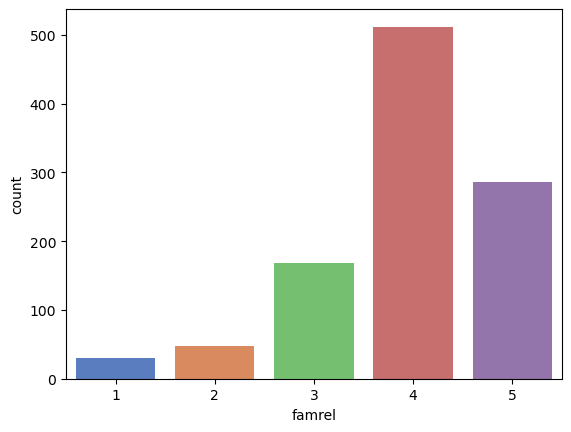

In [52]:
# Below code will create a count plot
sns.countplot(data = df,x='famrel', palette='muted')

In [53]:
#free time after school 
df['freetime'].value_counts()

freetime
3    408
4    293
2    171
5    108
1     64
Name: count, dtype: int64

<Axes: xlabel='freetime', ylabel='count'>

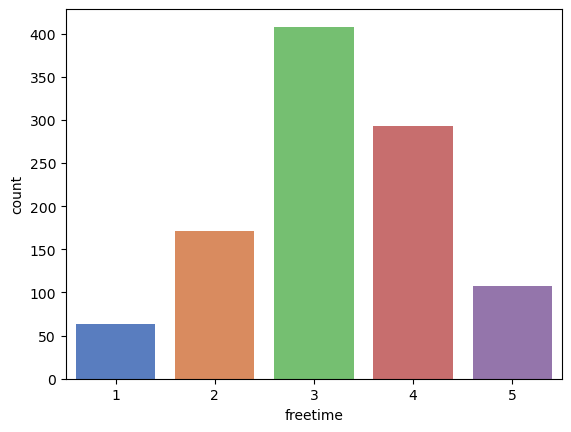

In [54]:
# Below code will create a count plot
sns.countplot(data = df,x='freetime', palette='muted')

In [55]:
#going out with friends
df['goout'].value_counts()

goout
3    335
2    248
4    227
5    163
1     71
Name: count, dtype: int64

<Axes: xlabel='goout', ylabel='count'>

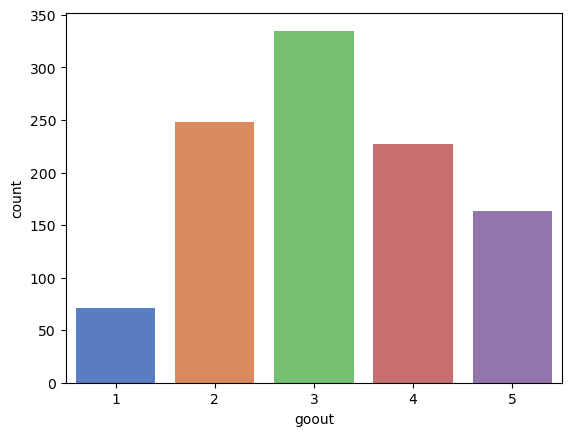

In [56]:
# Below code will create a count plot
sns.countplot(data = df,x='goout', palette='muted')

In [57]:
#workday alcohol consumption
df['Dalc'].value_counts()

Dalc
1    727
2    196
3     69
5     26
4     26
Name: count, dtype: int64

<Axes: xlabel='Dalc', ylabel='count'>

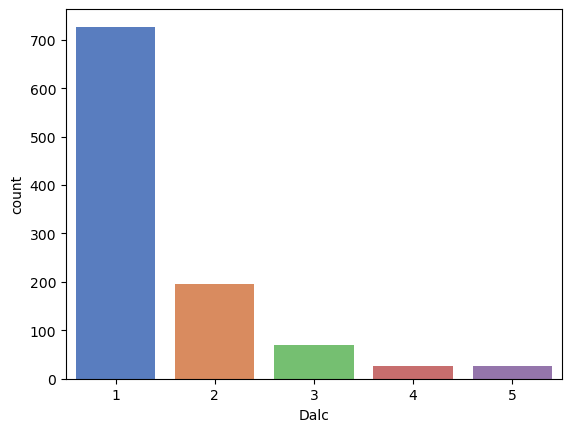

In [58]:
# Below code will create a count plot
sns.countplot(data = df,x='Dalc', palette='muted')

In [59]:
#weekend alcohol consumption
df['Walc'].value_counts()

Walc
1    398
2    235
3    200
4    138
5     73
Name: count, dtype: int64

<Axes: xlabel='Walc', ylabel='count'>

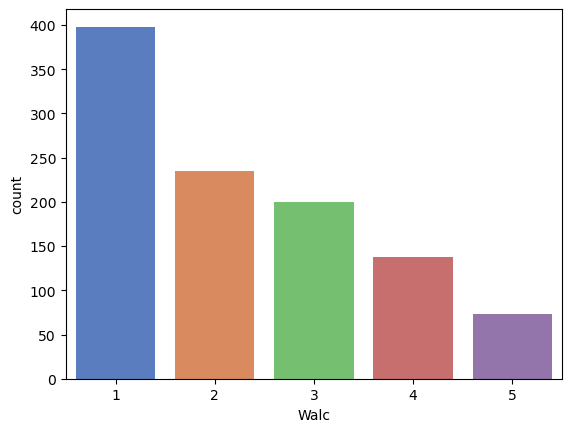

In [60]:
# Below code will create a count plot
sns.countplot(data = df,x='Walc', palette='muted')

In [61]:
#current health status
df['health'].value_counts()

health
5    395
3    215
4    174
1    137
2    123
Name: count, dtype: int64

<Axes: xlabel='health', ylabel='count'>

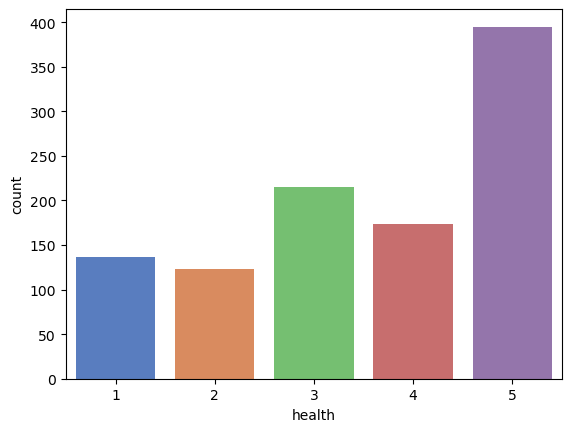

In [62]:
# Below code will create a count plot
sns.countplot(data = df,x='health', palette='muted')

In [63]:
#number of school absences
df['absences'].value_counts()

absences
0     359
2     175
4     146
6      80
8      64
10     38
12     24
14     20
16     17
5      17
1      15
3      15
9      10
7      10
11      8
18      8
15      5
22      5
13      4
20      4
21      3
24      2
26      2
30      2
40      1
23      1
17      1
38      1
28      1
19      1
75      1
56      1
54      1
25      1
32      1
Name: count, dtype: int64

<Axes: xlabel='absences', ylabel='count'>

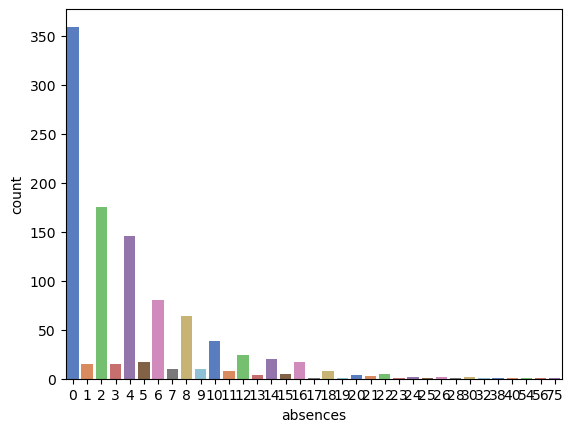

In [64]:
# Below code will create a count plot
sns.countplot(data = df,x='absences', palette='muted')

In [65]:
#first grade
df['G1'].value_counts()

G1
10    146
11    130
12    117
13    105
14    101
9      96
8      83
7      70
15     59
16     44
6      33
17     24
18     15
5      12
19      4
4       3
3       1
0       1
Name: count, dtype: int64

<Axes: xlabel='G1', ylabel='count'>

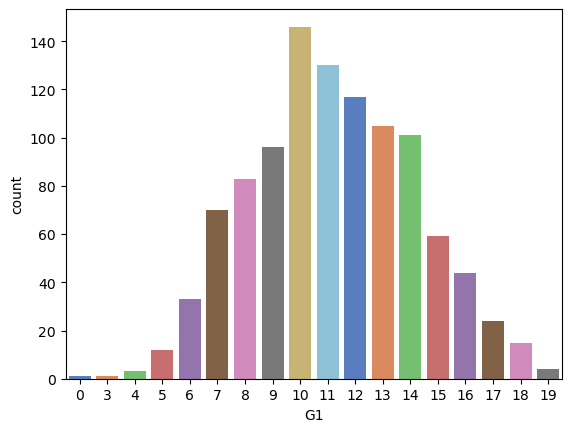

In [66]:
# Below code will create a count plot
sns.countplot(data = df,x='G1', palette='muted')

In [67]:
#second grade
df['G2'].value_counts()

G2
11    138
10    129
12    127
9     122
13    117
14     77
8      72
15     72
16     38
7      37
18     26
17     25
6      21
0      20
5      18
19      4
4       1
Name: count, dtype: int64

<Axes: xlabel='G2', ylabel='count'>

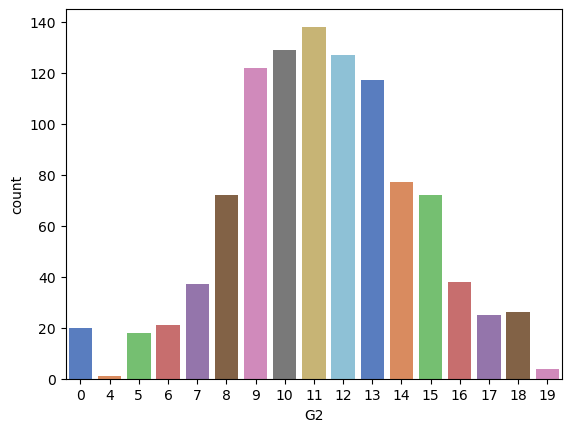

In [68]:
# Below code will create a count plot
sns.countplot(data = df,x='G2', palette='muted')

In [69]:
#final grade
df['G3'].value_counts()

G3
10    153
11    151
13    113
12    103
14     90
15     82
8      67
9      63
0      53
16     52
17     35
18     27
7      19
6      18
5       8
19      7
20      1
4       1
1       1
Name: count, dtype: int64

<Axes: xlabel='G3', ylabel='count'>

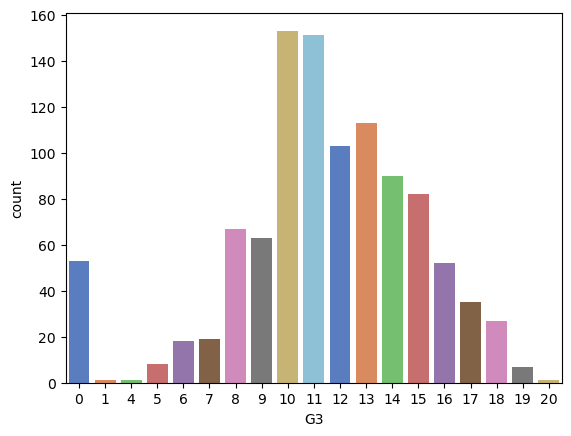

In [70]:
# Below code will create a count plot
sns.countplot(data = df,x='G3', palette='muted')

### Checking for outliers

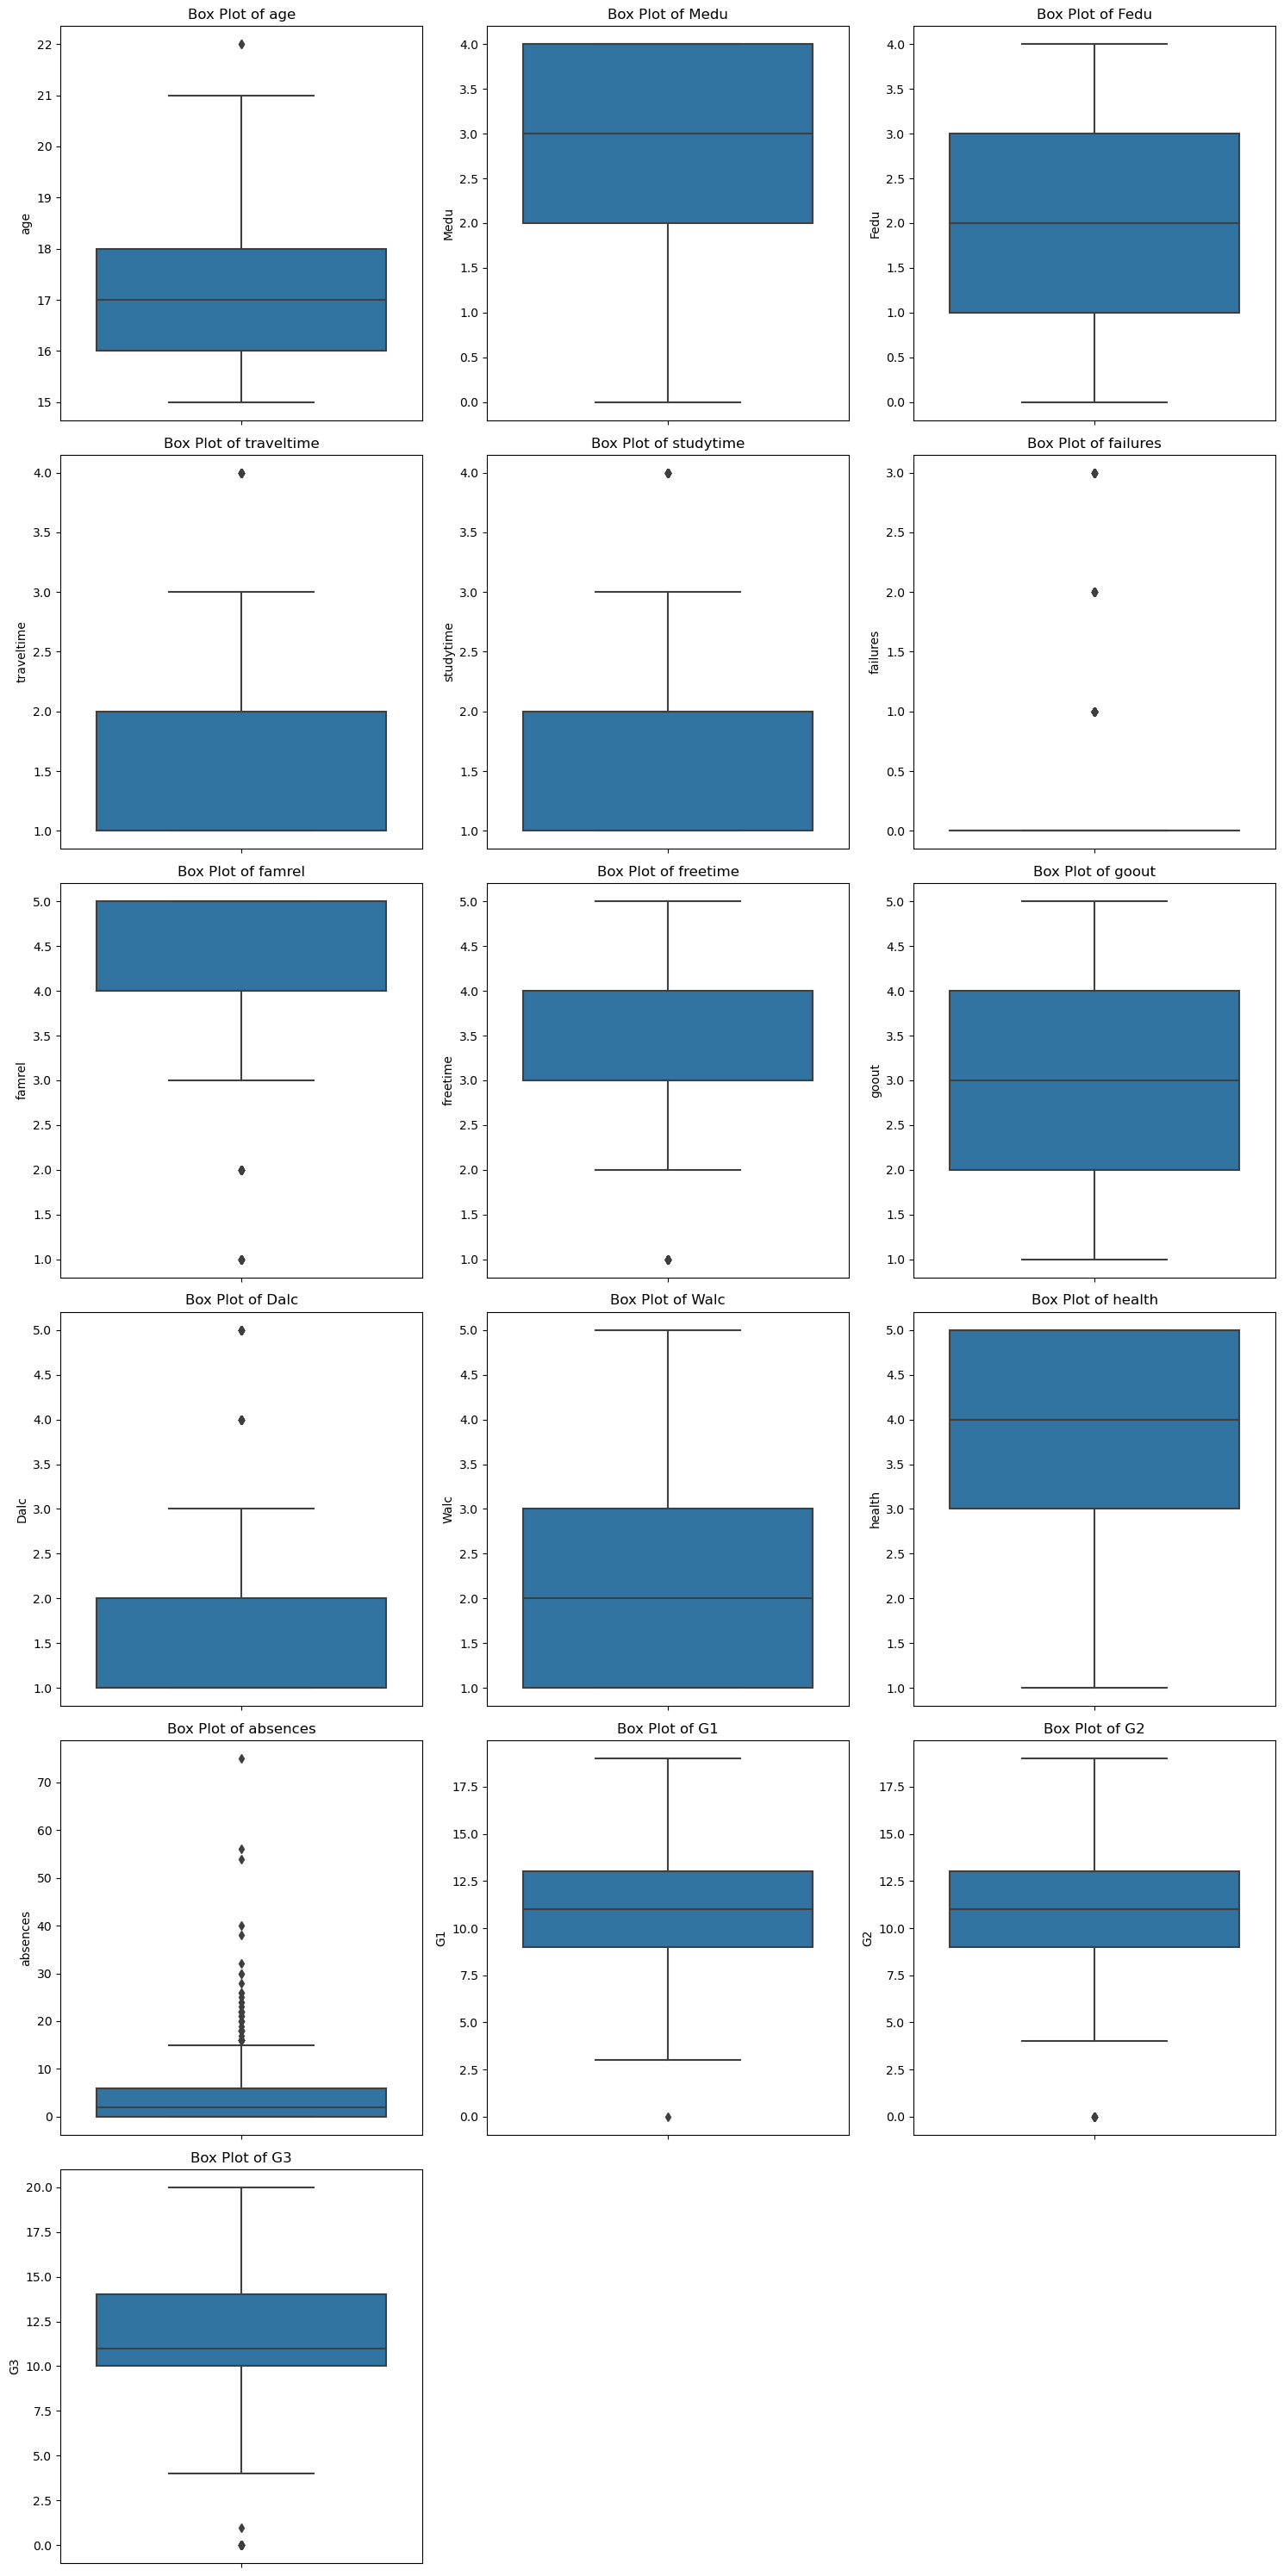

In [71]:
# Selecting a few numerical columns for demonstration
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']  # Replace or adjust with your dataset's numerical columns

# Creating box plots for the selected numerical columns
plt.figure(figsize=(15, 30))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(6, 3, i)  # Adjust grid size if needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Bivariate Analysis</h1>
</center>

In [72]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

correlation_matrix

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,-0.101163,-0.108411,-0.097877
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,-0.150943,-0.131576,-0.129642


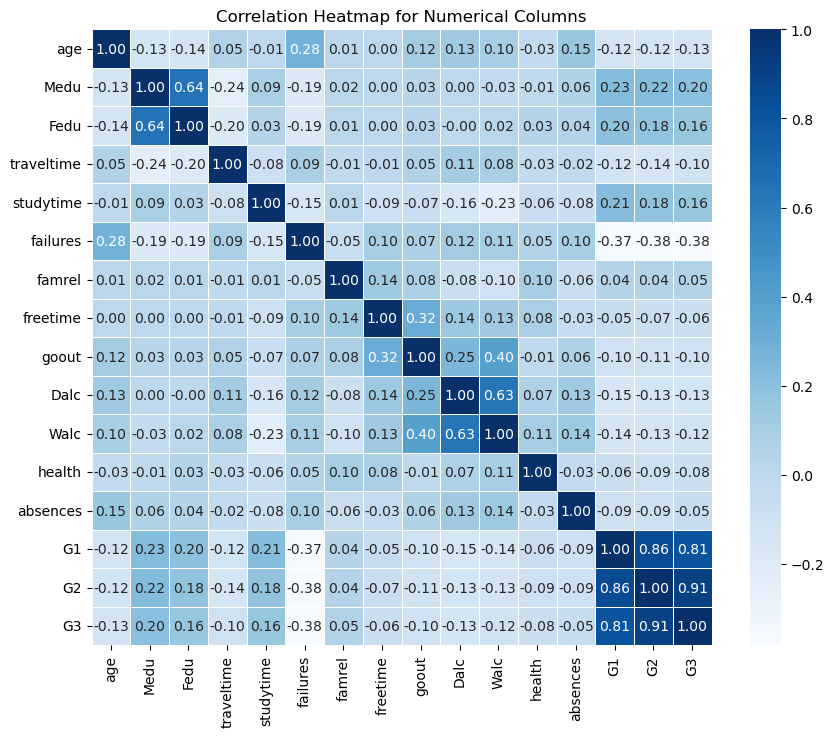

In [73]:

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

### barplots of every variable wrt target variable

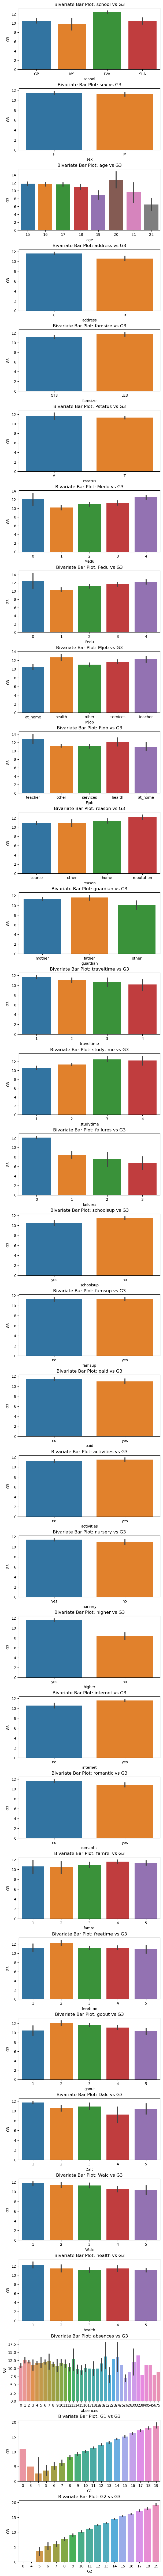

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named 'df' and the target variable is 'G3'
target_variable = 'G3'

# Get a list of all column names (excluding the target variable)
feature_columns = df.columns[df.columns != target_variable]

# Set up subplots
fig, axes = plt.subplots(nrows=len(feature_columns), ncols=1, figsize=(6, 3 * len(feature_columns)))
fig.tight_layout(h_pad=3)  # Adjust the spacing between subplots

# Create bivariate bar plots for each feature
for i, feature in enumerate(feature_columns):
    sns.barplot(x=feature, y=target_variable, data=df, ax=axes[i])
    axes[i].set_title(f'Bivariate Bar Plot: {feature} vs {target_variable}')

plt.show()


/Users/divya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


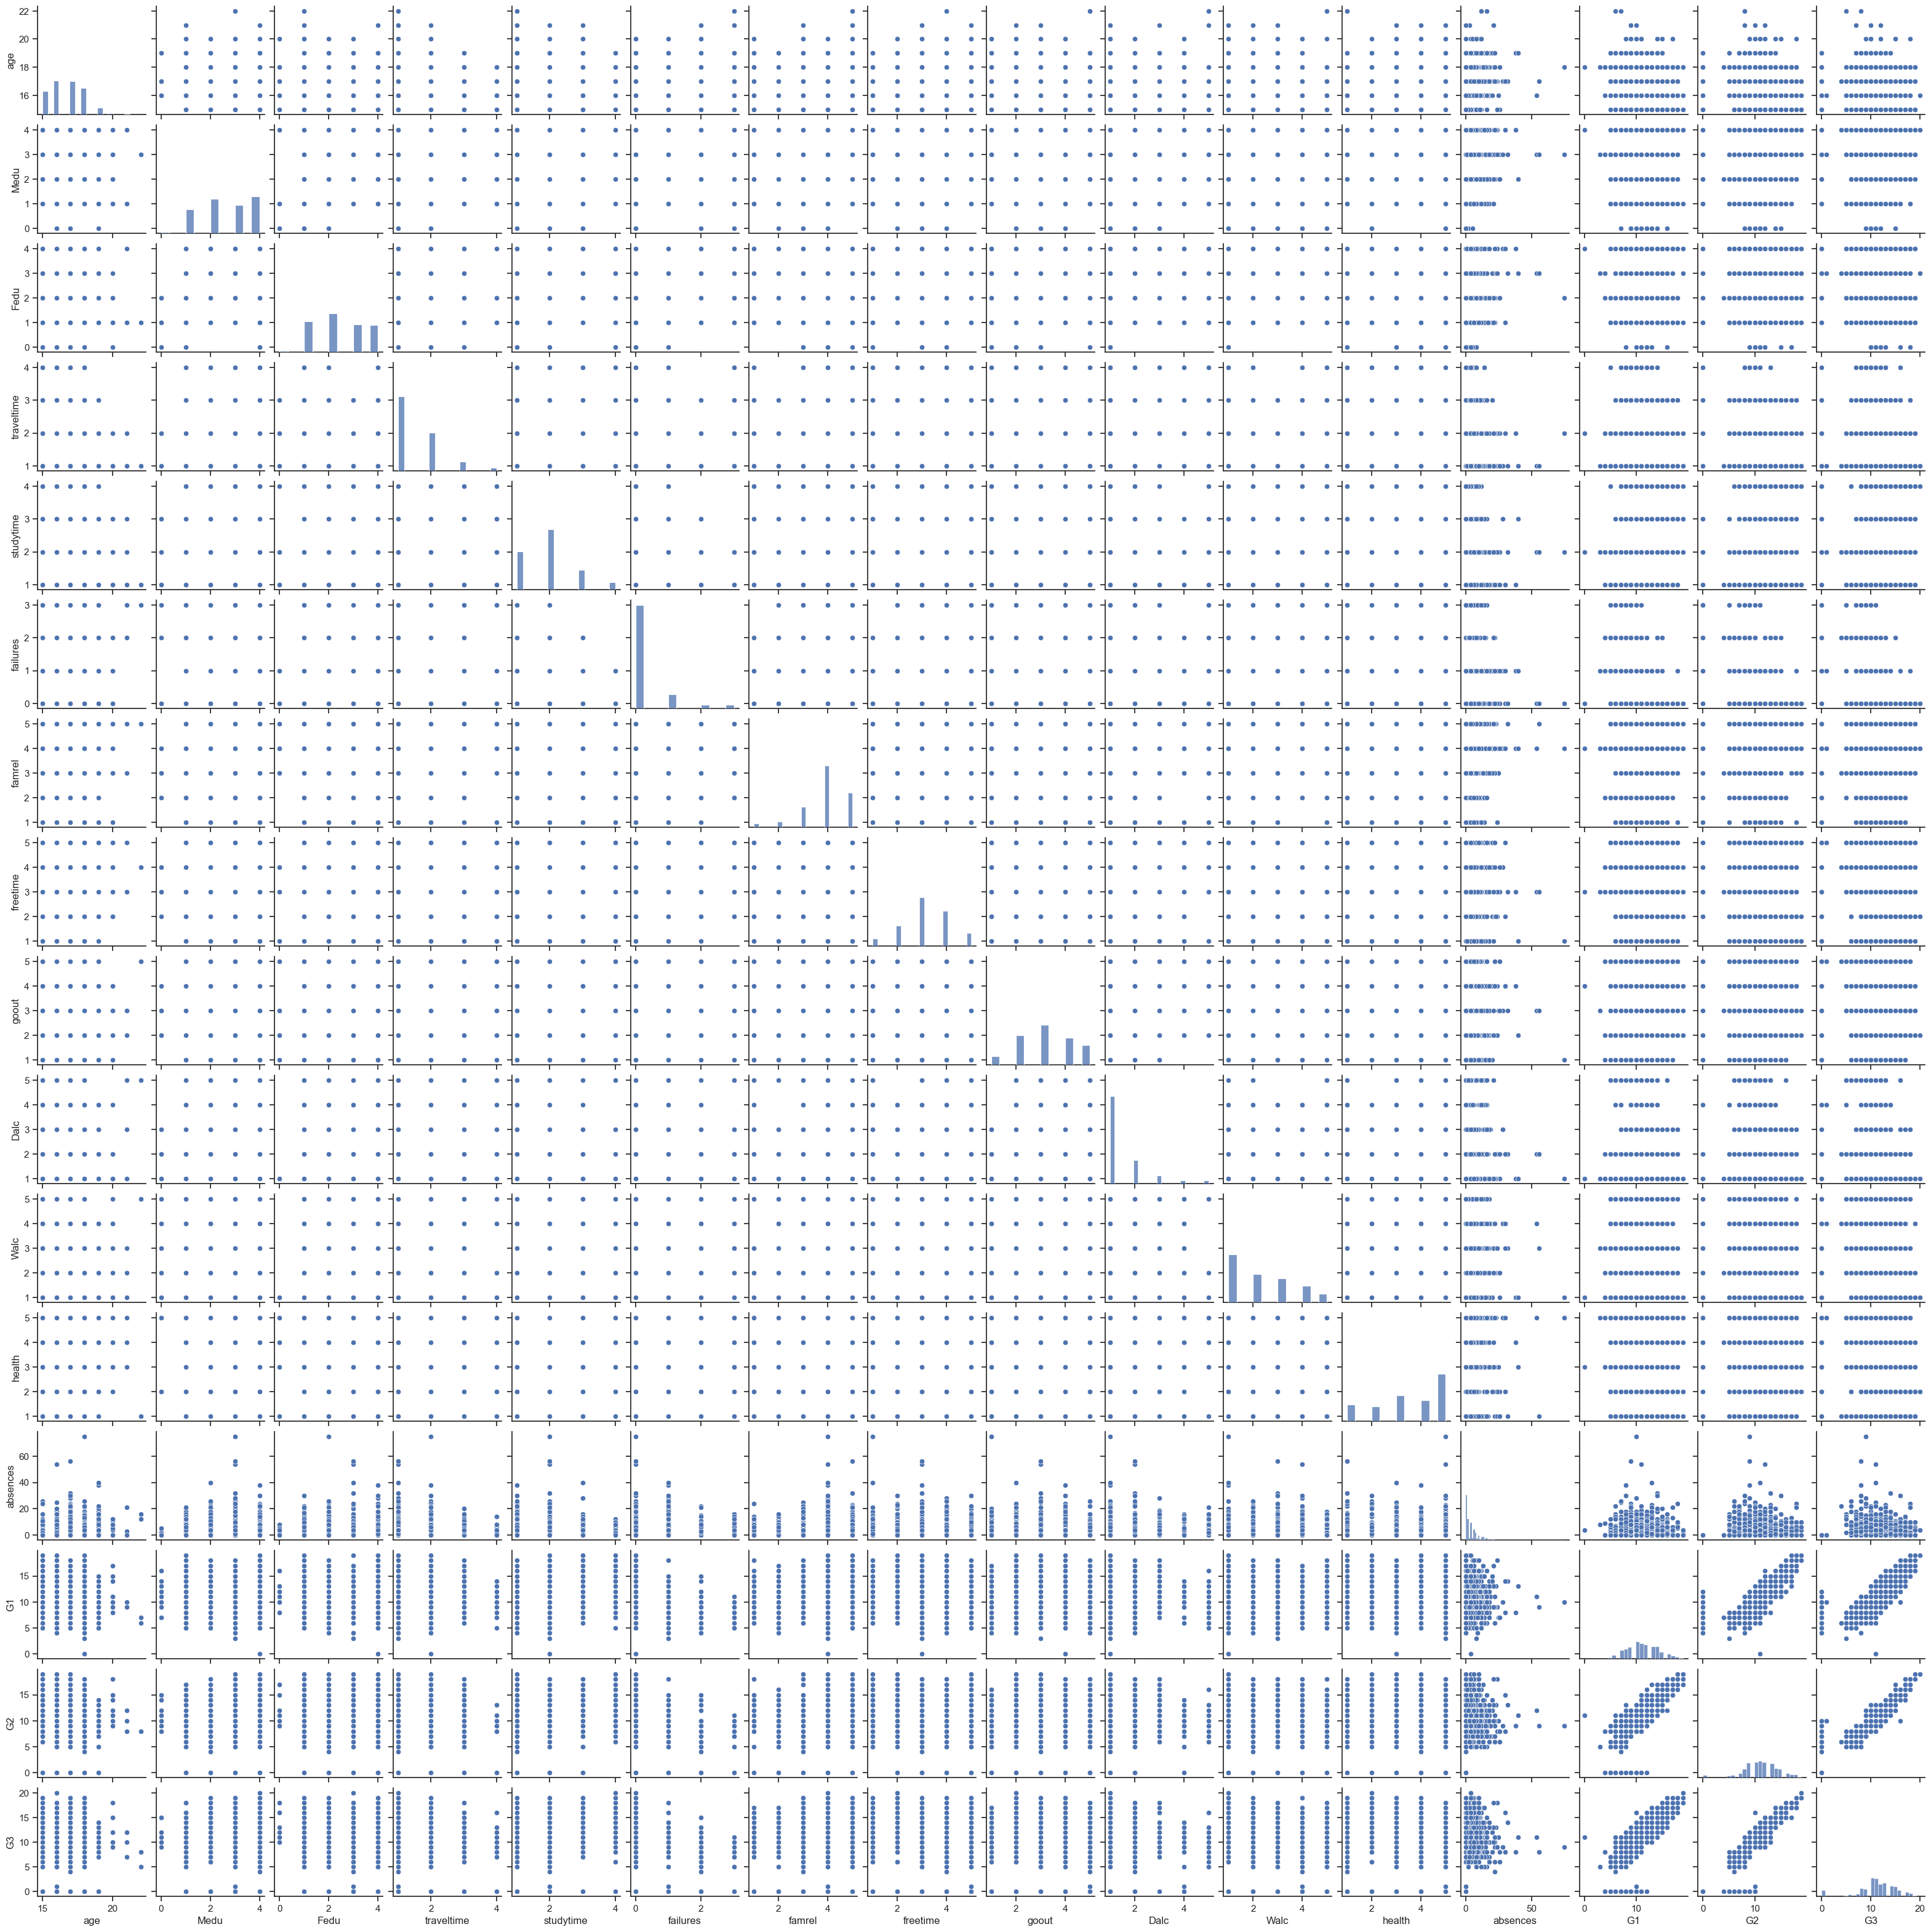

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named 'df'
sns.set(style="ticks")
sns.pairplot(df, height=2)
plt.show()

#sns.pairplot(df, hue='categorical_variable', height=2)
#plt.show()


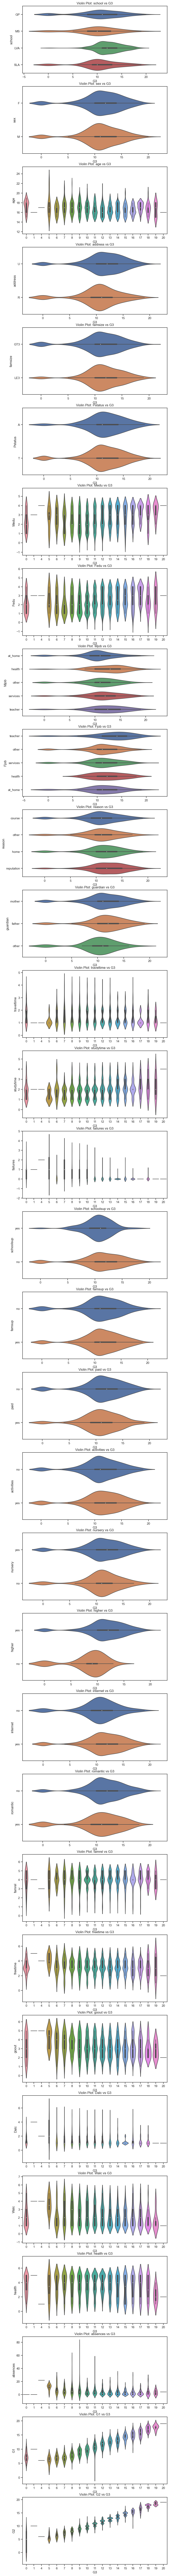

In [78]:
# Get the list of column names (excluding the target variable)
feature_columns = df.columns[df.columns != 'G3']

# Set up subplots
fig, axes = plt.subplots(nrows=len(feature_columns), ncols=1, figsize=(8, 4 * len(feature_columns)))
fig.tight_layout(h_pad=2)  # Adjust the spacing between subplots

# Create violin plots for each feature against the target variable
for i, feature in enumerate(feature_columns):
    sns.violinplot(x='G3', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Violin Plot: {feature} vs G3')

plt.show()